In [1]:
import numpy as np
from sklearn.datasets import load_wine

# load the wine dataset as a dictionary-like object
wine = load_wine()
print("Wine dataset keys:", wine.keys())
print("Wine dataset description:", wine.DESCR) # Description of the dataset

X = wine.data # numpy.ndarray
y = wine.target # numpy.ndarray

print("Wine dataset feature matrix:", X)
print("Wine dataset target vector:", y)

Wine dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
Wine dataset description: .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.1

In [2]:
def k_means(data_points, centers_init, n_clusters, max_iterations=100, tol=1e-4):
  centers = centers_init.copy() # make a copy of initial center to work on.
  for _ in range(max_iterations): # The underscore _ is a throwaway variable, meaning “I don’t care about the loop variable.”

    # Compute squared Euclidean distances to each centroid
    # Result shape: (n_samples, k)
    distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)

    # Assign each point to the index of the closest centroid
    closest_centroids = np.argmin(distances, axis=1)

    # Update centroids to be the mean of the data points assigned to them
    new_centers = np.zeros((n_clusters, data_points.shape[1]))
    # End if centroids no longer change
    for i in range(n_clusters):
      new_centers[i] = data_points[closest_centroids == i].mean(axis=0)

    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, closest_centroids

In [3]:
J = {} # Dictionary to store within-cluster variance for each k
np.random.seed(42)  # For reproducibility
for n_clusters in range(2, 11):

    # Randomly initialize cluster centers by selecting k unique data points
    centers_init = X[np.random.choice(X.shape[0], n_clusters, replace=False)]  
    # np.random.choice(): Randomly selects n_clusters unique indices from 0 … n_samples-1.
    #                     replace=False ensures no duplicate picks.
    centers, labels = k_means(X, centers_init, n_clusters=n_clusters)
    within_cluster_var = np.sum((X - centers[labels]) ** 2) # sum of squared distances to the assigned centroid.
    J[n_clusters] = within_cluster_var
    print(f"Converged centers for {n_clusters} clusters:", centers)
    print(f"Within-cluster variance for {n_clusters} clusters:", within_cluster_var)


Converged centers for 2 clusters: [[1.27028455e+01 2.54455285e+00 2.33910569e+00 2.04081301e+01
  9.68130081e+01 2.06211382e+00 1.64146341e+00 3.92682927e-01
  1.45406504e+00 4.85138211e+00 9.08617886e-01 2.40821138e+00
  5.65869919e+02]
 [1.36665455e+01 1.87072727e+00 2.42781818e+00 1.74527273e+01
  1.06290909e+02 2.81618182e+00 2.89654545e+00 2.92909091e-01
  1.89690909e+00 5.52036364e+00 1.06665455e+00 3.06672727e+00
  1.15172727e+03]]
Within-cluster variance for 2 clusters: 4543749.614531862
Converged centers for 3 clusters: [[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226

Text(0, 0.5, 'Within-cluster variance')

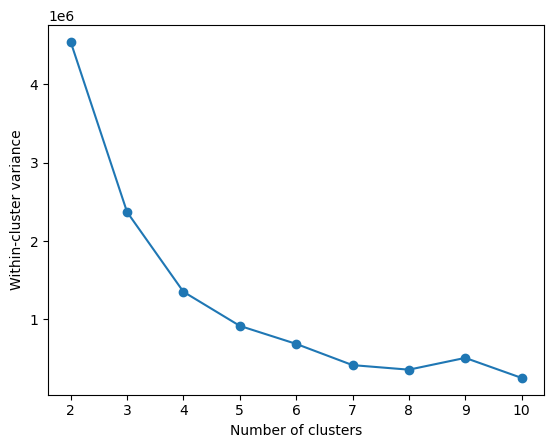

In [4]:
# Plotting the within-cluster variance over the number of clusters
import matplotlib.pyplot as plt
plt.plot(J.keys(), J.values(), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster variance')

Use sklearn's libraries

Within-cluster variance for 2 clusters: 4543749.614531862
Within-cluster variance for 3 clusters: 2370689.686782968
Within-cluster variance for 4 clusters: 1351749.3691428085
Within-cluster variance for 5 clusters: 916379.1871539169
Within-cluster variance for 6 clusters: 686225.3337970132
Within-cluster variance for 7 clusters: 414997.5629249221
Within-cluster variance for 8 clusters: 356788.9107396088
Within-cluster variance for 9 clusters: 507371.9985665164
Within-cluster variance for 10 clusters: 251326.40146556255


c:\Users\milic\anaconda3\envs\ee2213\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

Text(0, 0.5, 'Within-cluster variance')

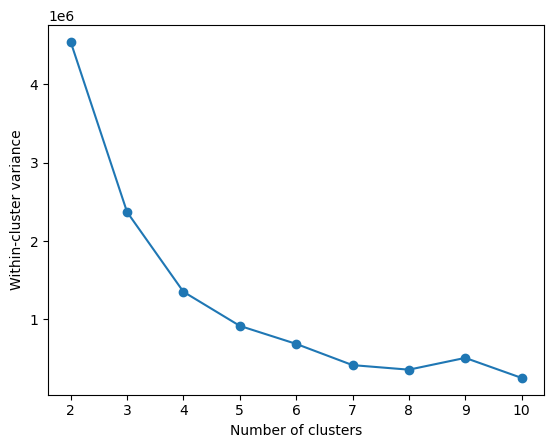

In [5]:
from sklearn.cluster import KMeans

J = {}
np.random.seed(42)  # For reproducibility
for n_clusters in range(2, 11):
    centers_init = X[np.random.choice(X.shape[0], n_clusters, replace = False)] # np.random.choice(): k random indices.
    kmeans = KMeans(n_clusters=n_clusters, init=centers_init, n_init=1)
    #n_init: The number of times the KMeans algorithm will run with different centroid seeds
    #        Setting n_init=1 means it will only run once, using the given centers_init
    kmeans.fit(X)
    within_cluster_var = np.sum((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
    J[n_clusters] = within_cluster_var
    print(f"Within-cluster variance for {n_clusters} clusters:", within_cluster_var)

import matplotlib.pyplot as plt
plt.plot(list(J.keys()), list(J.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster variance')